### 📌 데이터 불균형 처리별 모델 성능 평가

#### 1️. 앞 선 모델링
- 로지스틱 회귀부터 CatBoost까지 다양한 모델을 사용하여 **데이터 불균형 처리 기법별 성능을 비교**함.
- 실험에 사용한 **데이터 불균형 처리 기법**:
  - `랜덤 언더 샘플링`
  - `SMOTE-NC`
  - `SMOTE-NC + 랜덤 언더 샘플링`
  - `클래스 가중치 적용`

---

#### 2️. 결과 분석
- **SMOTE-NC 및 SMOTE-NC + 랜덤 언더 샘플링**  
  → 모든 모델에서 **가장 좋지 않은 성능**을 보임.  
- **랜덤 언더 샘플링 & 클래스 가중치 적용**  
  → SMOTE-NC보다 좋은 성능을 보이며 상대적으로 더 우수한 결과를 나타냄.
- 모델은 `CatBoost`, `LightGBM`, `XGBoost`에서 좋은 성능을 보임. 

---

#### 3️. 추가 실험 계획
- 앞 선 모델링 실험은 **4월~5월 데이터**를 사용하여 진행함.
- 이제 **전체 데이터(2월~9월)를 불러와 학습 데이터(train)로 사용**.
- 데이터 불균형 처리는 **랜덤 언더 샘플링 및 가중치 적용** 방법을 사용하여 한 번 더 모델 성능을 평가할 예정.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

전체 데이터를 불러온 뒤, 2월~9월 데이터를 train 데이터로 생성

In [3]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv")

test 데이터 불러오기

In [26]:
test = pd.read_csv("data/train/test.csv")

In [9]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [13]:
train.to_csv("data/train/train.csv", index=False)

In [6]:
train

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,2,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 12개월이상,20240325,733,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,3,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.00,약정만료전 9~12개월,20240325,764,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,JTBC,0.00,N,N,N,3.33
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,6,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.00,약정만료전 6~9개월,20240325,855,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,기타,0.00,N,N,N,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647055,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,5,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2246,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.67,KBS2,4.00,N,N,N,1.41
15647056,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,6,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2276,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.14,KBS1,1.00,N,N,N,1.35
15647057,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2307,N,N,N,1.00,일주일내,N,N,50대,수신,수신,4.10,기타,4.00,N,N,N,1.77
15647058,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,8,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2338,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,KBS1,0.00,N,N,N,0.01


In [5]:
train = pd.read_csv("data/train.csv")

In [10]:
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    15541354
Y      105706
Name: count, dtype: int64

#### 랜덤 언더 샘플링 진행

In [11]:
train

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,2,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 12개월이상,20240325,733,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,3,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.00,약정만료전 9~12개월,20240325,764,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,JTBC,0.00,N,N,N,3.33
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,6,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.00,약정만료전 6~9개월,20240325,855,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,기타,0.00,N,N,N,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483404,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,5,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2246,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.67,KBS2,4.00,N,N,N,1.41
21483405,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,6,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2276,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.14,KBS1,1.00,N,N,N,1.35
21483406,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2307,N,N,N,1.00,일주일내,N,N,50대,수신,수신,4.10,기타,4.00,N,N,N,1.77
21483407,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,8,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2338,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,KBS1,0.00,N,N,N,0.01


In [12]:
train = train.drop(columns = ['sha2_hash','AGMT_END_YMD','p_mt'])

In [13]:
train['churn'].value_counts()

churn
N    15541354
Y      105706
Name: count, dtype: int64

In [14]:
# 랜덤 시드 42로 설정하고 랜덤 언더 샘플링 진행
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [15]:
# 원본 데이터 churn 분포!
print("랜덤 언더 샘플링 전:")
print(y.value_counts())

# 랜덤 언더 샘플링 후, churn 분포!
print("\n랜덤 언더 샘플링 후:")
print(pd.Series(y_resampled).value_counts())

랜덤 언더 샘플링 전:
churn
N    15541354
Y      105706
Name: count, dtype: int64

랜덤 언더 샘플링 후:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [16]:
display(X_resampled, y_resampled)
display(type(X_resampled), type(y_resampled))

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH
5974729,36개월 이상,HD,프리미엄,N,Y,약정승계,N,0건,0건,O/B,10.00,약정만료후 12개월이상,3884,N,N,N,2.00,일주일내,N,N,90대이상,전체거부,수신,3.91,기타,0.00,N,N,9.24
11550258,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.00,약정만료후 3~6개월,4096,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,0.00
13228859,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,10.00,약정만료전 1개월,3846,Y,N,N,2.00,일주일내,N,N,90대이상,수신,수신,4.06,TV조선,0.00,N,N,0.14
17810895,12개월~24개월미만,UHD,베이직,N,N,신규,N,0건,0건,I/B,0.00,약정만료전 12개월이상,486,Y,Y,N,2.00,일주일내,N,N,20대,수신,수신,3.33,기타,0.00,N,Y,15.54
4011627,6개월미만,UHD,베이직,N,N,약정승계,N,0건,0건,I/B,20.00,약정만료후 12개월이상,2550,N,N,N,2.00,일주일내,Y,Y,30대,수신,수신,3.30,기타,0.00,N,Y,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482304,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,일반상담,0.00,약정만료전 12개월이상,3712,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,1.90,tvN,0.00,N,N,0.26
21482453,12개월~24개월미만,HD,이코노미,N,N,신규,Y,0건,0건,O/B,0.00,약정만료전 12개월이상,501,Y,N,N,2.00,3개월내없음,N,N,30대,수신,수신,0.00,기타,0.00,N,N,0.00
21482939,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.00,약정만료전 12개월이상,11,Y,Y,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,3.49,기타,0.00,Y,Y,0.65
21483128,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.00,약정만료전 12개월이상,231,N,N,N,1.00,일주일전,N,N,50대,전체거부,전체거부,0.62,기타,0.00,N,N,0.00


5974729     N
11550258    N
13228859    N
17810895    N
4011627     N
           ..
21482304    Y
21482453    Y
21482939    Y
21483128    Y
21483129    Y
Name: churn, Length: 211412, dtype: object

pandas.core.frame.DataFrame

pandas.core.series.Series

In [17]:
# y_resampled의 이름을 churn으로 명확하게 설정
y_resampled = pd.Series(y_resampled, name='churn')

# 그리고 X_resampled와 y_resampled 병합
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [18]:
display(resampled_data)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
5974729,36개월 이상,HD,프리미엄,N,Y,약정승계,N,0건,0건,O/B,10.00,약정만료후 12개월이상,3884,N,N,N,2.00,일주일내,N,N,90대이상,전체거부,수신,3.91,기타,0.00,N,N,9.24,N
11550258,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.00,약정만료후 3~6개월,4096,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,0.00,N
13228859,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,10.00,약정만료전 1개월,3846,Y,N,N,2.00,일주일내,N,N,90대이상,수신,수신,4.06,TV조선,0.00,N,N,0.14,N
17810895,12개월~24개월미만,UHD,베이직,N,N,신규,N,0건,0건,I/B,0.00,약정만료전 12개월이상,486,Y,Y,N,2.00,일주일내,N,N,20대,수신,수신,3.33,기타,0.00,N,Y,15.54,N
4011627,6개월미만,UHD,베이직,N,N,약정승계,N,0건,0건,I/B,20.00,약정만료후 12개월이상,2550,N,N,N,2.00,일주일내,Y,Y,30대,수신,수신,3.30,기타,0.00,N,Y,0.05,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482304,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,일반상담,0.00,약정만료전 12개월이상,3712,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,1.90,tvN,0.00,N,N,0.26,Y
21482453,12개월~24개월미만,HD,이코노미,N,N,신규,Y,0건,0건,O/B,0.00,약정만료전 12개월이상,501,Y,N,N,2.00,3개월내없음,N,N,30대,수신,수신,0.00,기타,0.00,N,N,0.00,Y
21482939,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.00,약정만료전 12개월이상,11,Y,Y,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,3.49,기타,0.00,Y,Y,0.65,Y
21483128,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.00,약정만료전 12개월이상,231,N,N,N,1.00,일주일전,N,N,50대,전체거부,전체거부,0.62,기타,0.00,N,N,0.00,Y


([<matplotlib.axis.XTick at 0x23732e75bb0>,
 [Text(0.0, 0, 'N'), Text(1.0, 0, 'Y')])

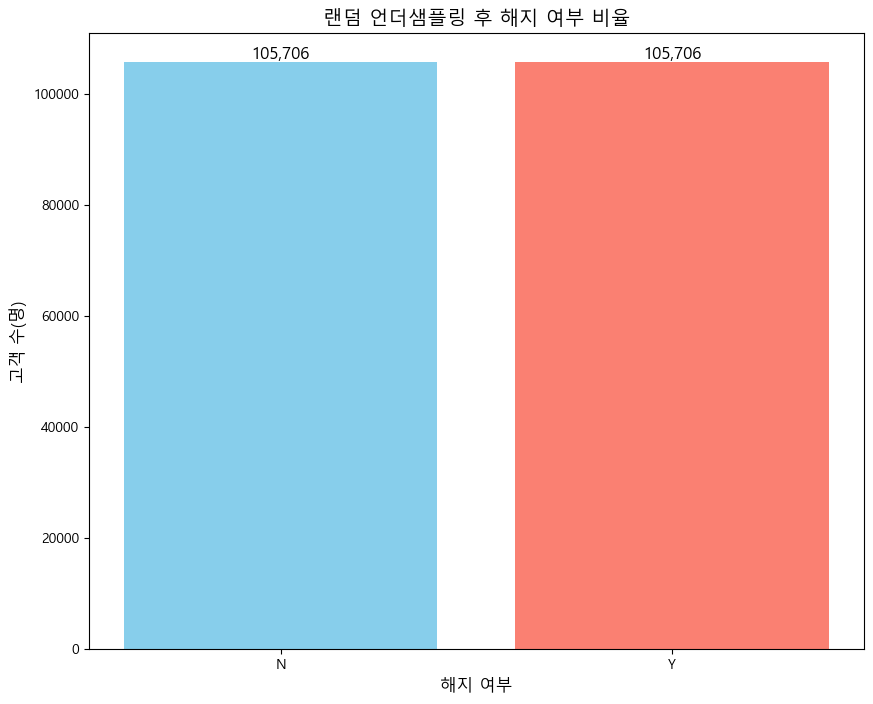

In [15]:
import matplotlib.pyplot as plt

churn_counts = resampled_data['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('랜덤 언더샘플링 후 해지 여부 비율', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

In [23]:
# CSV 파일로 저장
resampled_data.to_csv('data/train/train_undersample_2_9.csv', index=False)

---

### 로지스틱 회귀 진행

In [20]:
display(train, test)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
5974729,36개월 이상,HD,프리미엄,N,Y,약정승계,N,0건,0건,O/B,10.00,약정만료후 12개월이상,3884,N,N,N,2.00,일주일내,N,N,90대이상,전체거부,수신,3.91,기타,0.00,N,N,9.24,N
11550258,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.00,약정만료후 3~6개월,4096,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,0.00,N
13228859,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,10.00,약정만료전 1개월,3846,Y,N,N,2.00,일주일내,N,N,90대이상,수신,수신,4.06,TV조선,0.00,N,N,0.14,N
17810895,12개월~24개월미만,UHD,베이직,N,N,신규,N,0건,0건,I/B,0.00,약정만료전 12개월이상,486,Y,Y,N,2.00,일주일내,N,N,20대,수신,수신,3.33,기타,0.00,N,Y,15.54,N
4011627,6개월미만,UHD,베이직,N,N,약정승계,N,0건,0건,I/B,20.00,약정만료후 12개월이상,2550,N,N,N,2.00,일주일내,Y,Y,30대,수신,수신,3.30,기타,0.00,N,Y,0.05,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21482304,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,일반상담,0.00,약정만료전 12개월이상,3712,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,1.90,tvN,0.00,N,N,0.26,Y
21482453,12개월~24개월미만,HD,이코노미,N,N,신규,Y,0건,0건,O/B,0.00,약정만료전 12개월이상,501,Y,N,N,2.00,3개월내없음,N,N,30대,수신,수신,0.00,기타,0.00,N,N,0.00,Y
21482939,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.00,약정만료전 12개월이상,11,Y,Y,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,3.49,기타,0.00,Y,Y,0.65,Y
21483128,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.00,약정만료전 12개월이상,231,N,N,N,1.00,일주일전,N,N,50대,전체거부,전체거부,0.62,기타,0.00,N,N,0.00,Y


,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
9,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,11,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20260820,1008,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,6.23,기타,0.00,N,N,N,4.72
20,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,11,24개월~ 36개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,70.00,약정만료전 6~9개월,20240616,4402,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,15.37,기타,1.00,N,N,N,0.48
31,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,11,36개월 이상,HD,베이직,N,Y,재약정,N,0건,0건,일반상담,10.00,약정만료전 12개월이상,20250718,2641,Y,N,N,6.00,일주일내,N,N,60대,수신,수신,1.47,기타,1.00,N,N,N,2.97
42,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,11,36개월 이상,HD,이코노미,N,Y,신규,N,0건,0건,일반상담,10.00,약정만료후 9~12개월,20230127,1989,N,N,N,3.00,일주일내,N,N,60대,수신,수신,2.16,기타,0.00,N,N,N,11.85
53,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,11,36개월 이상,HD,프리미엄,N,Y,신규,N,1건,1건,현장경로,0.00,약정만료후 12개월이상,20190828,3979,Y,N,N,4.00,일주일내,Y,N,50대,수신,수신,1.64,기타,0.00,N,N,N,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483366,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,11,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.00,약정만료후 12개월이상,20191114,3599,N,N,N,2.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,N,0.00
21483377,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,11,36개월 이상,HD,이코노미,N,N,신규,N,1건,0건,O/B,10.00,약정만료후 12개월이상,20200831,2281,Y,N,N,3.00,일주일내,N,N,40대,전체거부,전체거부,1.81,MBN,0.00,N,N,N,4.40
21483388,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,11,12개월~24개월미만,HD,이코노미,N,N,약정승계,N,0건,0건,일반상담,0.00,약정만료후 12개월이상,20141014,3958,N,N,N,2.00,일주일내,N,N,30대,수신,수신,1.69,기타,0.00,N,N,N,0.00
21483399,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,11,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1552,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,3.39,기타,0.00,N,N,N,2.42


In [21]:
# INHOME_RATE 컬럼은 object로

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [22]:
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

레이블 인코딩 진행

In [23]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [24]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 SVC_USE_DAYS_GRP 레이블 인코딩 매핑
{'12개월~24개월미만': 0, '24개월~ 36개월미만': 1, '36개월 이상': 2, '6개월~12개월미만': 3, '6개월미만': 4}
------------------------------
🔹 MEDIA_NM_GRP 레이블 인코딩 매핑
{'HD': 0, 'UHD': 1, '기타': 2}
------------------------------
🔹 PROD_NM_GRP 레이블 인코딩 매핑
{'기타': 0, '베이직': 1, '세이버': 2, '스탠다드': 3, '이코노미': 4, '프리미엄': 5}
------------------------------
🔹 PROD_OLD_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 PROD_ONE_PLUS_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 AGMT_KIND_NM 레이블 인코딩 매핑
{'신규': 0, '약정갱신': 1, '약정승계': 2, '약정연장': 3, '약정축소': 4, '재약정': 5, '정보없음': 6}
------------------------------
🔹 STB_RES_1M_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 SVOD_SCRB_CNT_GRP 레이블 인코딩 매핑
{'0건': 0, '1건': 1, '2건': 2, '3건 이상': 3}
------------------------------
🔹 PAID_CHNL_CNT_GRP 레이블 인코딩 매핑
{'0건': 0, '1건': 1, '2건': 2, '3건 이상': 3}
------------------------------
🔹 SCRB_PATH_NM_GRP 레이블 인코딩 매핑
{'I/B': 0, 'O/B': 1, '기타': 2, '렌탈제휴': 3, '일반상담': 4, '임직원': 5,

In [25]:
display(train)
display(test)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
0,2,0,5,0,1,2,0,0,0,1,1,9,3884,0,0,0,2.00,4,0,0,8,3,2,3.91,12,0.00,0,0,9.24,0
1,2,0,1,0,0,5,0,0,0,9,0,12,4096,0,0,0,1.00,1,0,0,4,2,2,0.00,12,0.00,0,0,0.00,0
2,2,0,1,0,0,5,0,0,0,1,1,4,3846,1,0,0,2.00,4,0,0,8,2,2,4.06,8,0.00,0,0,0.14,0
3,0,1,1,0,0,0,0,0,0,0,0,2,486,1,1,0,2.00,4,0,0,1,2,2,3.33,12,0.00,0,1,15.54,0
4,4,1,1,0,0,2,0,0,0,0,3,9,2550,0,0,0,2.00,4,1,1,2,2,2,3.30,12,0.00,0,1,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,2,0,5,0,0,5,1,0,0,4,0,2,3712,1,0,0,2.00,4,0,0,5,2,2,1.90,11,0.00,0,0,0.26,1
211408,0,0,4,0,0,0,1,0,0,1,0,2,501,1,0,0,2.00,1,0,0,2,2,2,0.00,12,0.00,0,0,0.00,1
211409,4,1,5,0,0,0,1,0,0,9,0,2,11,1,1,0,2.00,4,1,0,4,3,3,3.49,12,0.00,1,1,0.65,1
211410,3,0,1,0,0,0,0,0,0,9,0,2,231,0,0,0,1.00,5,0,0,4,3,3,0.62,12,0.00,0,0,0.00,1


,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
0,1,0,4,0,1,5,0,0,0,0,3,2,1008,1,1,0,3.00,4,0,0,5,2,2,6.23,12,0.00,0,0,4.72,0
1,1,0,5,0,0,5,0,0,0,0,8,7,4402,1,1,0,2.00,4,0,0,4,2,2,15.37,12,1.00,0,0,0.48,0
2,2,0,1,0,1,5,0,0,0,4,1,2,2641,1,0,0,6.00,4,0,0,5,2,2,1.47,12,1.00,0,0,2.97,0
3,2,0,4,0,1,0,0,0,0,4,1,14,1989,0,0,0,3.00,4,0,0,5,2,2,2.16,12,0.00,0,0,11.85,0
4,2,0,5,0,1,0,0,1,1,9,0,9,3979,1,0,0,4.00,4,1,0,4,2,2,1.64,12,0.00,0,0,2.81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945590,2,0,1,0,0,5,0,0,0,9,0,9,3599,0,0,0,2.00,1,0,0,4,2,2,0.00,12,0.00,0,0,0.00,0
1945591,2,0,4,0,0,0,0,1,0,1,1,9,2281,1,0,0,3.00,4,0,0,3,3,3,1.81,5,0.00,0,0,4.40,0
1945592,0,0,4,0,0,2,0,0,0,4,0,9,3958,0,0,0,2.00,4,0,0,2,2,2,1.69,12,0.00,0,0,0.00,0
1945593,2,1,1,0,0,5,0,0,0,0,3,2,1552,1,0,0,2.00,4,0,0,4,2,2,3.39,12,0.00,0,0,2.42,0


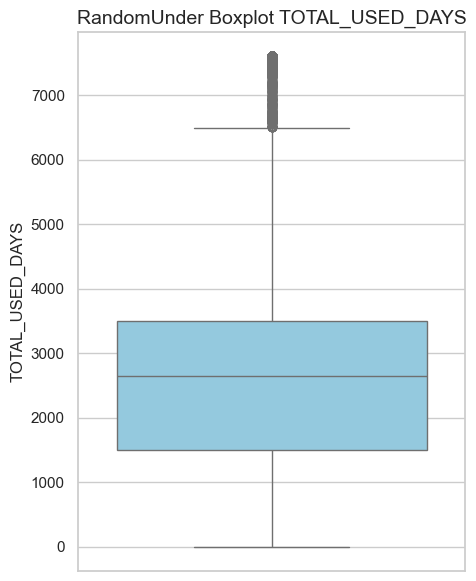

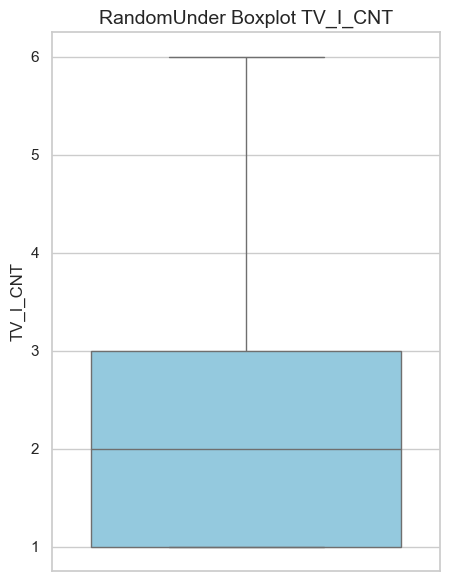

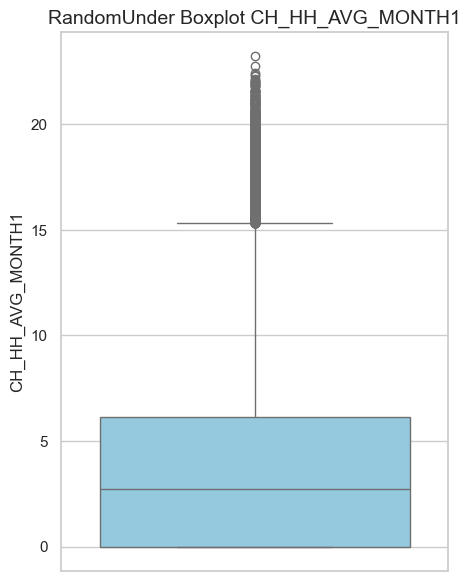

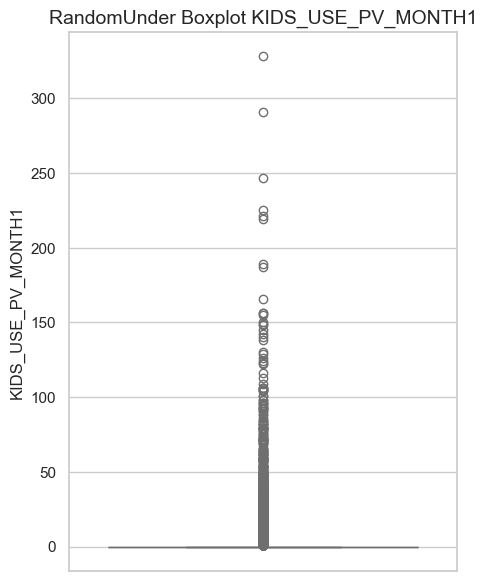

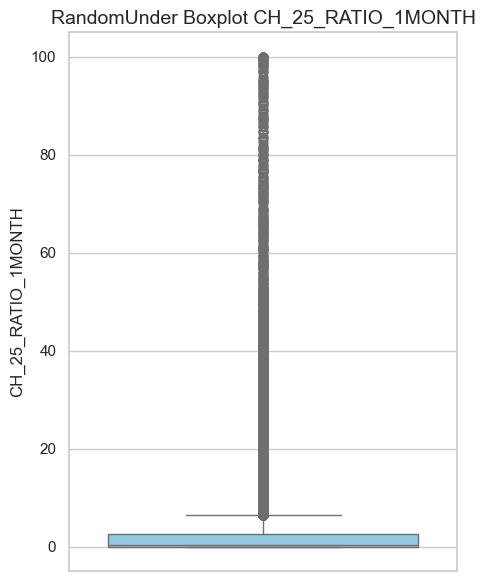

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# df에서 연속형(수치형) 변수 찾기
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# 각 연속형 변수에 대해 boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [27]:
display(train, test)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
0,0.50,0.00,1.00,0.00,1.00,0.33,0.00,0.00,0.00,0.11,0.10,0.62,0.62,0.00,0.00,0.00,0.20,0.80,0.00,0.00,0.89,1.00,0.67,0.20,0.92,0.00,0.00,0.00,3.47,0
1,0.50,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,1.00,0.00,0.85,0.73,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.44,0.67,0.67,-0.44,0.92,0.00,0.00,0.00,-0.15,0
2,0.50,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.11,0.10,0.23,0.60,1.00,0.00,0.00,0.20,0.80,0.00,0.00,0.89,0.67,0.67,0.22,0.62,0.00,0.00,0.00,-0.10,0
3,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,-1.08,1.00,1.00,0.00,0.20,0.80,0.00,0.00,0.11,0.67,0.67,0.10,0.92,0.00,0.00,1.00,5.94,0
4,1.00,0.50,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.30,0.62,-0.04,0.00,0.00,0.00,0.20,0.80,1.00,1.00,0.22,0.67,0.67,0.10,0.92,0.00,0.00,1.00,-0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211407,0.50,0.00,1.00,0.00,0.00,0.83,1.00,0.00,0.00,0.44,0.00,0.08,0.54,1.00,0.00,0.00,0.20,0.80,0.00,0.00,0.56,0.67,0.67,-0.13,0.85,0.00,0.00,0.00,-0.05,1
211408,0.00,0.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00,0.11,0.00,0.08,-1.07,1.00,0.00,0.00,0.20,0.20,0.00,0.00,0.22,0.67,0.67,-0.44,0.92,0.00,0.00,0.00,-0.15,1
211409,1.00,0.50,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.08,-1.32,1.00,1.00,0.00,0.20,0.80,1.00,0.00,0.44,1.00,1.00,0.13,0.92,0.00,1.00,1.00,0.10,1
211410,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.08,-1.21,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.44,1.00,1.00,-0.34,0.92,0.00,0.00,0.00,-0.15,1


,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
0,0.25,0.00,0.75,0.00,1.00,0.83,0.00,0.00,0.00,0.00,0.30,0.08,-0.82,1.00,1.00,0.00,0.40,0.80,0.00,0.00,0.56,0.67,0.67,0.58,0.92,0.00,0.00,0.00,1.70,0
1,0.25,0.00,1.00,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.80,0.46,0.88,1.00,1.00,0.00,0.20,0.80,0.00,0.00,0.44,0.67,0.67,2.07,0.92,1.00,0.00,0.00,0.04,0
2,0.50,0.00,0.00,0.00,1.00,0.83,0.00,0.00,0.00,0.44,0.10,0.08,0.00,1.00,0.00,0.00,1.00,0.80,0.00,0.00,0.56,0.67,0.67,-0.20,0.92,1.00,0.00,0.00,1.01,0
3,0.50,0.00,0.75,0.00,1.00,0.00,0.00,0.00,0.00,0.44,0.10,1.00,-0.32,0.00,0.00,0.00,0.40,0.80,0.00,0.00,0.56,0.67,0.67,-0.09,0.92,0.00,0.00,0.00,4.49,0
4,0.50,0.00,1.00,0.00,1.00,0.00,0.00,0.33,0.33,1.00,0.00,0.62,0.67,1.00,0.00,0.00,0.60,0.80,1.00,0.00,0.44,0.67,0.67,-0.17,0.92,0.00,0.00,0.00,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945590,0.50,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,1.00,0.00,0.62,0.48,0.00,0.00,0.00,0.20,0.20,0.00,0.00,0.44,0.67,0.67,-0.44,0.92,0.00,0.00,0.00,-0.15,0
1945591,0.50,0.00,0.75,0.00,0.00,0.00,0.00,0.33,0.00,0.11,0.10,0.62,-0.18,1.00,0.00,0.00,0.40,0.80,0.00,0.00,0.33,1.00,1.00,-0.15,0.38,0.00,0.00,0.00,1.57,0
1945592,0.00,0.00,0.75,0.00,0.00,0.33,0.00,0.00,0.00,0.44,0.00,0.62,0.66,0.00,0.00,0.00,0.20,0.80,0.00,0.00,0.22,0.67,0.67,-0.17,0.92,0.00,0.00,0.00,-0.15,0
1945593,0.50,0.50,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.30,0.08,-0.54,1.00,0.00,0.00,0.20,0.80,0.00,0.00,0.44,0.67,0.67,0.11,0.92,0.00,0.00,0.00,0.80,0


In [28]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
#
model = LogisticRegression(solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Test Accuracy: 0.77

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.78      0.87   1932419
           1       0.02      0.70      0.04     13176

    accuracy                           0.77   1945595
   macro avg       0.51      0.74      0.46   1945595
weighted avg       0.99      0.77      0.87   1945595


Confusion Matrix (테스트 데이터):
[[1497824  434595]
 [   3942    9234]]


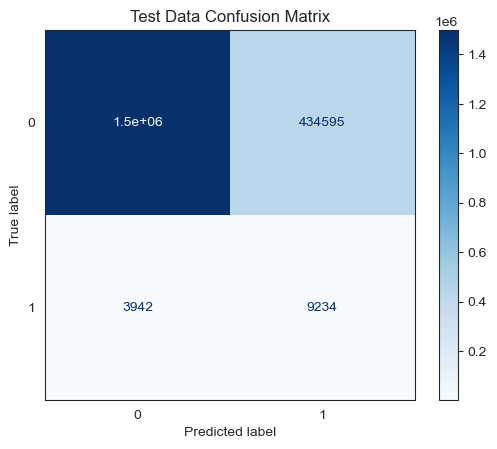

Test AUC-ROC: 0.81


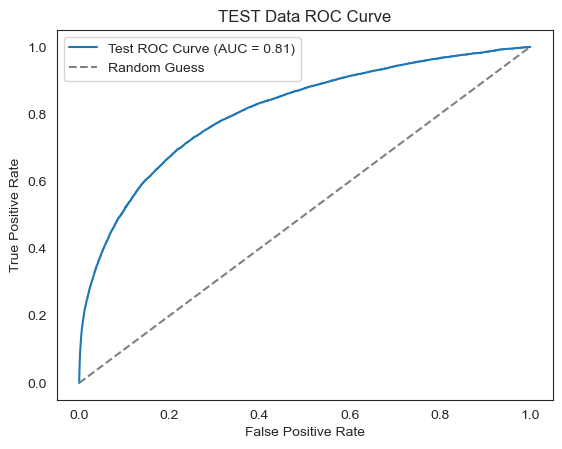

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

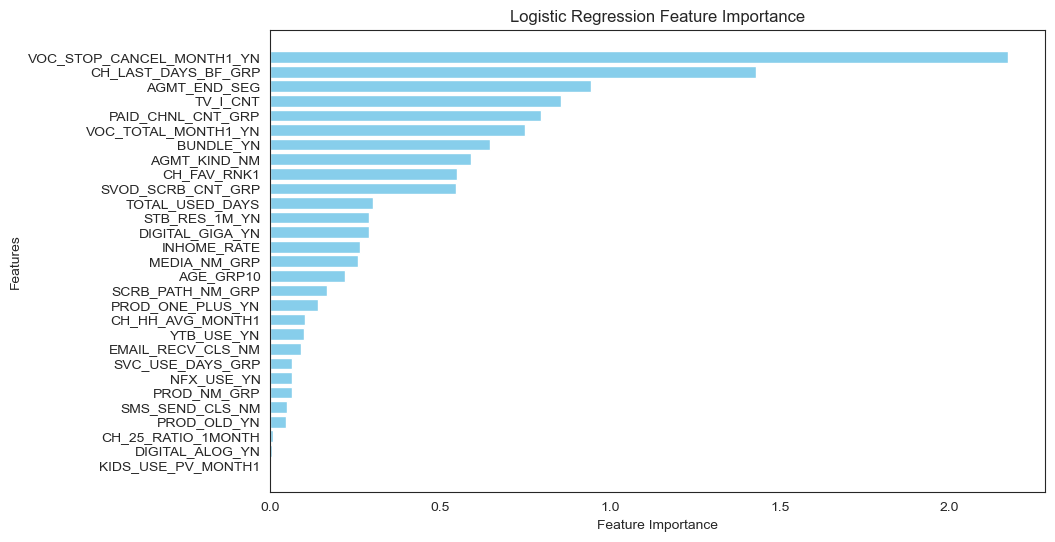

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance 추출 (절댓값 사용)
feature_importance = np.abs(model.coef_[0])

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

랜덤 포레스트 진행

In [32]:
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 랜덤 포레스트 모델
rf_model = RandomForestClassifier(
    n_estimators=100,  # 트리 개수
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.02      0.70      0.05     13176

    accuracy                           0.81   1945595
   macro avg       0.51      0.75      0.47   1945595
weighted avg       0.99      0.81      0.89   1945595


Confusion Matrix (테스트 데이터):
[[1562795  369624]
 [   3989    9187]]


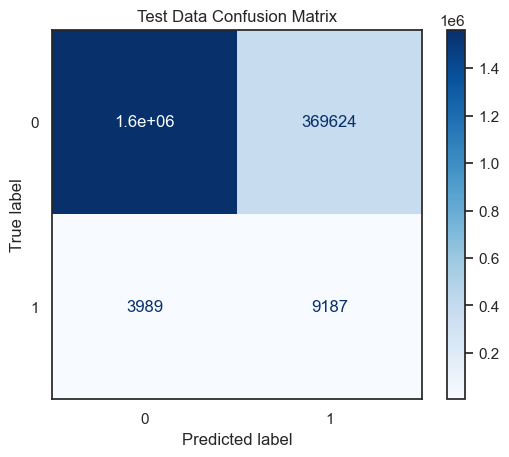

Test AUC-ROC: 0.82


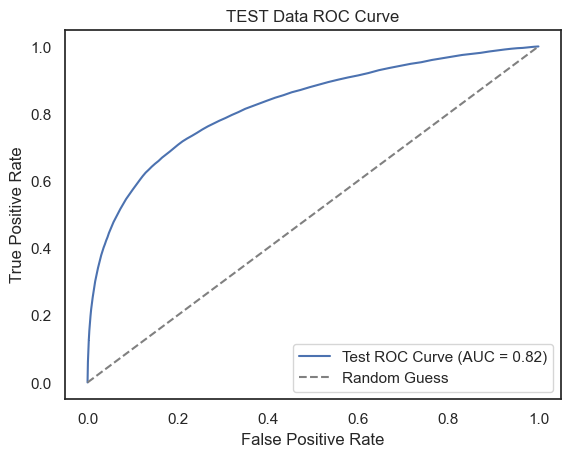

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = rf_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=rf_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

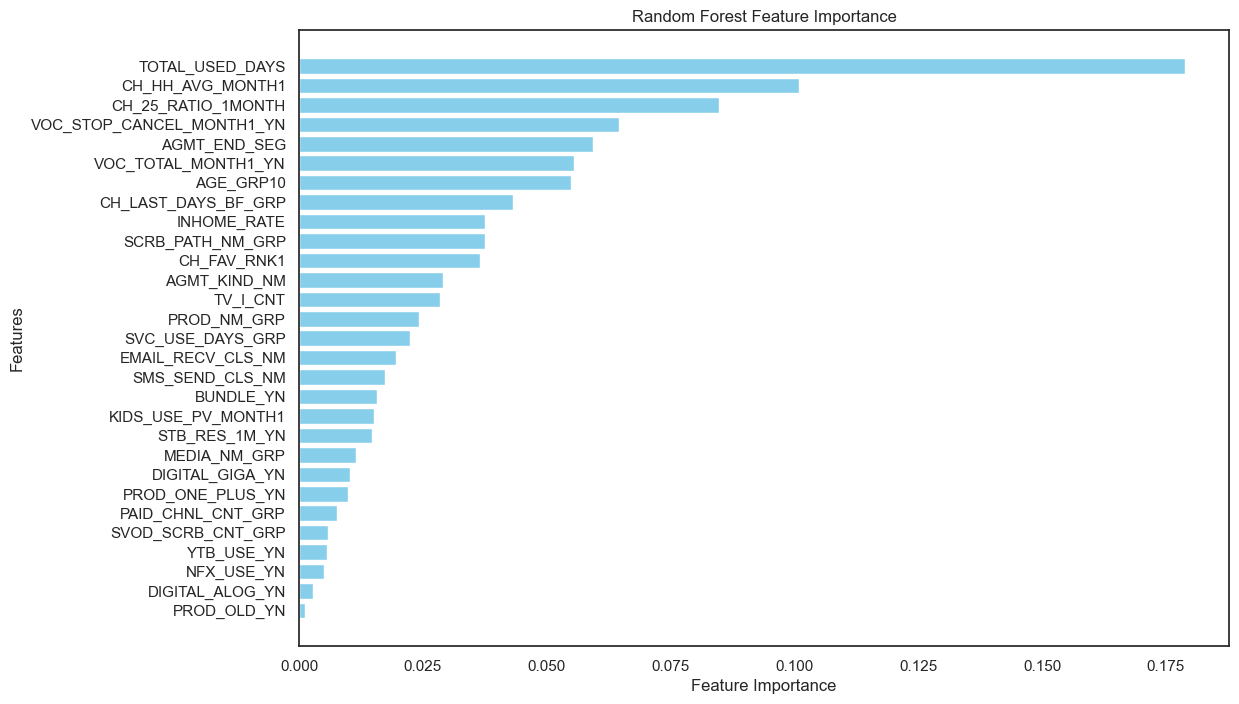

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

XGB 진행

In [37]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.81      0.89   1945595


Confusion Matrix (테스트 데이터):
[[1564740  367679]
 [   3467    9709]]


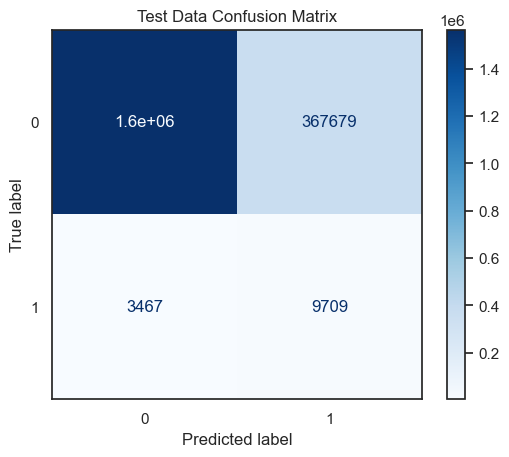

Test AUC-ROC: 0.85


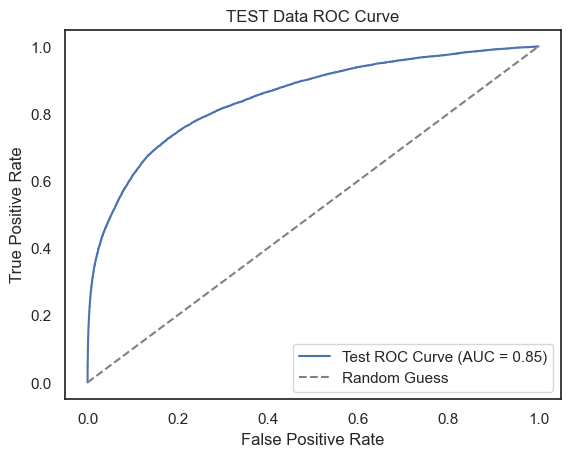

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = xgb_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

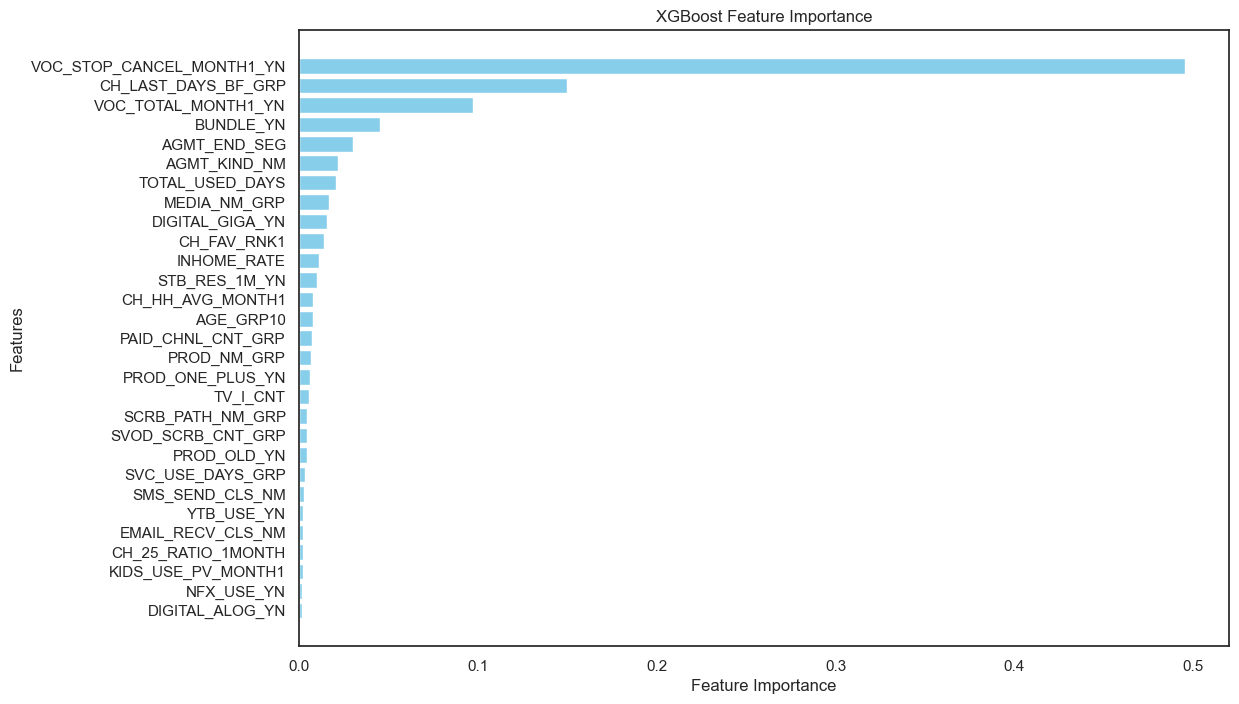

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

LGBM 진행

In [50]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.81      0.89   1945595


Confusion Matrix (테스트 데이터):
[[1559487  372932]
 [   3452    9724]]


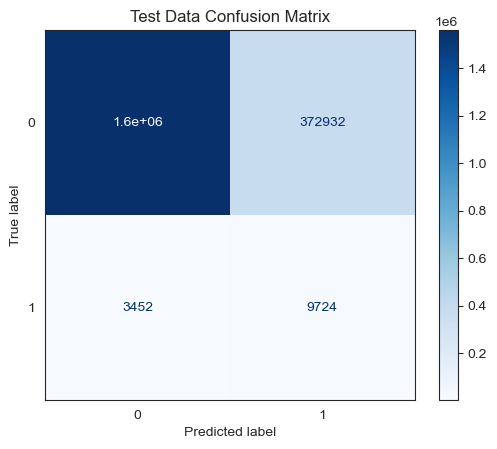

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

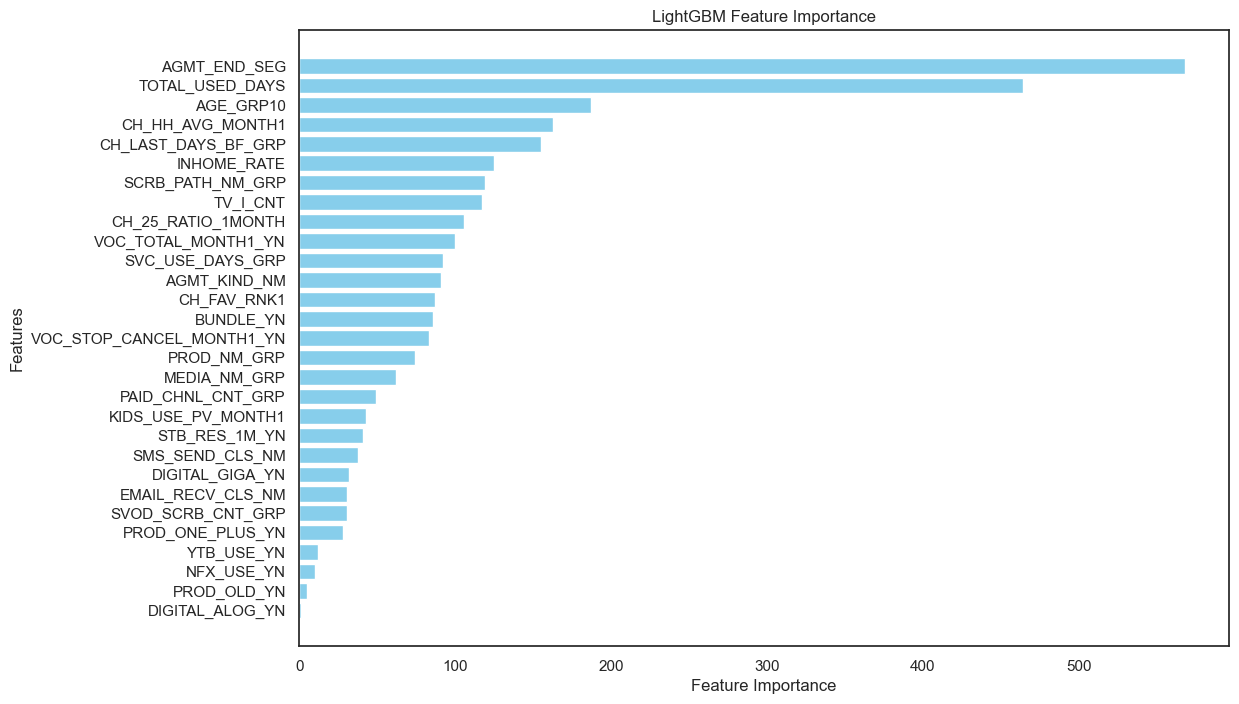

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

Catboost 진행

In [40]:
from catboost import CatBoostClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# 기본값을 사용한 CatBoost 모델 생성
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# 모델 학습
cat_model.fit(X_train, y_train)

0:	learn: 0.6815474	total: 168ms	remaining: 2m 47s
1:	learn: 0.6705085	total: 194ms	remaining: 1m 36s
2:	learn: 0.6605728	total: 220ms	remaining: 1m 12s
3:	learn: 0.6512978	total: 244ms	remaining: 1m
4:	learn: 0.6428390	total: 267ms	remaining: 53.1s
5:	learn: 0.6344104	total: 293ms	remaining: 48.5s
6:	learn: 0.6270461	total: 317ms	remaining: 45s
7:	learn: 0.6199318	total: 342ms	remaining: 42.4s
8:	learn: 0.6136676	total: 370ms	remaining: 40.7s
9:	learn: 0.6080627	total: 400ms	remaining: 39.6s
10:	learn: 0.6031480	total: 459ms	remaining: 41.3s
11:	learn: 0.5983222	total: 496ms	remaining: 40.8s
12:	learn: 0.5934132	total: 522ms	remaining: 39.6s
13:	learn: 0.5888987	total: 546ms	remaining: 38.5s
14:	learn: 0.5850586	total: 572ms	remaining: 37.5s
15:	learn: 0.5808178	total: 600ms	remaining: 36.9s
16:	learn: 0.5774176	total: 642ms	remaining: 37.1s
17:	learn: 0.5736646	total: 684ms	remaining: 37.3s
18:	learn: 0.5708396	total: 708ms	remaining: 36.6s
19:	learn: 0.5681292	total: 745ms	remaining

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.81      0.89   1945595


Confusion Matrix (테스트 데이터):
[[1561809  370610]
 [   3415    9761]]


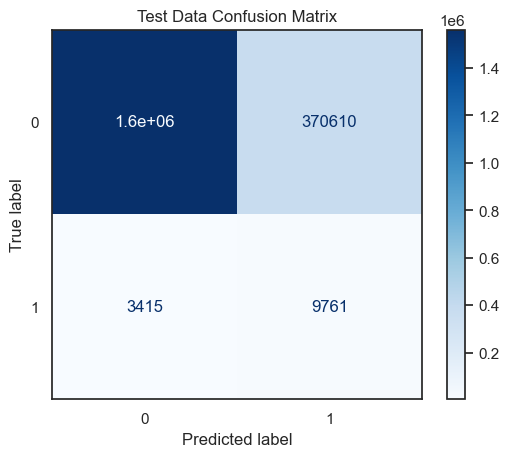

Test AUC-ROC: 0.85


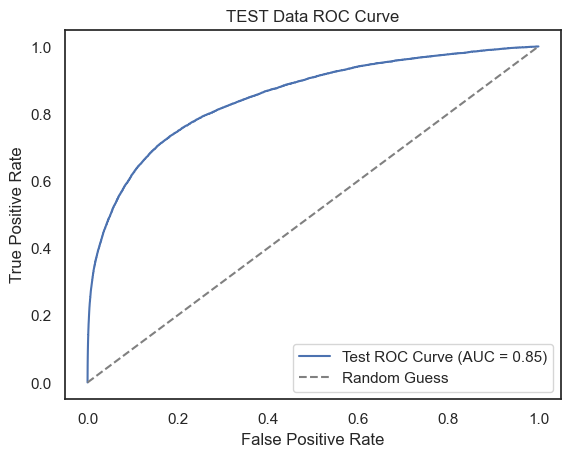

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = cat_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

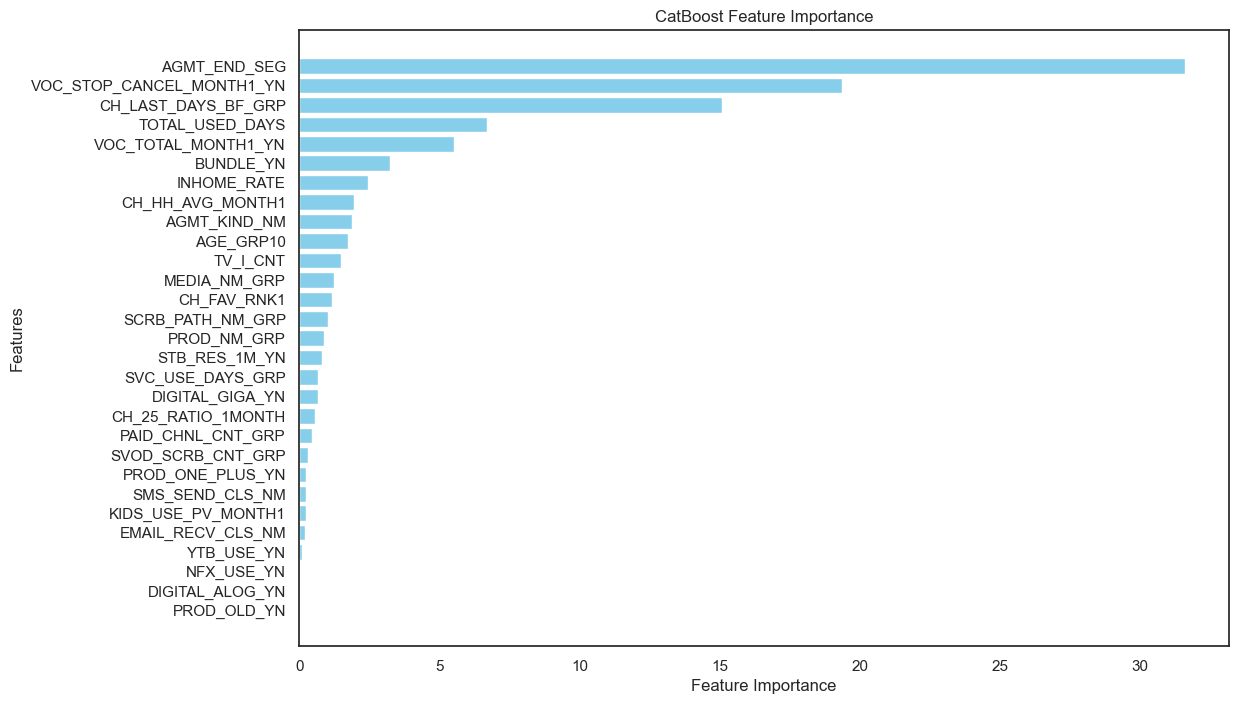

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance 추출
feature_importance = cat_model.get_feature_importance()

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 가중치 (로지스틱, LGMB)

로지스틱 회귀 가중치 진행

In [3]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv")

In [8]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]

In [4]:
test = pd.read_csv("data/train/test.csv")

In [7]:
display(train, test)

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,2,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 12개월이상,20240325,733,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,3,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.00,약정만료전 9~12개월,20240325,764,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,JTBC,0.00,N,N,N,3.33
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,6,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.00,약정만료전 6~9개월,20240325,855,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,기타,0.00,N,N,N,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647055,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,5,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2246,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.67,KBS2,4.00,N,N,N,1.41
15647056,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,6,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2276,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.14,KBS1,1.00,N,N,N,1.35
15647057,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2307,N,N,N,1.00,일주일내,N,N,50대,수신,수신,4.10,기타,4.00,N,N,N,1.77
15647058,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,8,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2338,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,KBS1,0.00,N,N,N,0.01


,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,11,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20260820,1008,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,6.23,기타,0.00,N,N,N,4.72
1,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,11,24개월~ 36개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,70.00,약정만료전 6~9개월,20240616,4402,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,15.37,기타,1.00,N,N,N,0.48
2,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,11,36개월 이상,HD,베이직,N,Y,재약정,N,0건,0건,일반상담,10.00,약정만료전 12개월이상,20250718,2641,Y,N,N,6.00,일주일내,N,N,60대,수신,수신,1.47,기타,1.00,N,N,N,2.97
3,00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17,11,36개월 이상,HD,이코노미,N,Y,신규,N,0건,0건,일반상담,10.00,약정만료후 9~12개월,20230127,1989,N,N,N,3.00,일주일내,N,N,60대,수신,수신,2.16,기타,0.00,N,N,N,11.85
4,00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c,11,36개월 이상,HD,프리미엄,N,Y,신규,N,1건,1건,현장경로,0.00,약정만료후 12개월이상,20190828,3979,Y,N,N,4.00,일주일내,Y,N,50대,수신,수신,1.64,기타,0.00,N,N,N,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945590,ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c,11,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.00,약정만료후 12개월이상,20191114,3599,N,N,N,2.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1945591,ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba,11,36개월 이상,HD,이코노미,N,N,신규,N,1건,0건,O/B,10.00,약정만료후 12개월이상,20200831,2281,Y,N,N,3.00,일주일내,N,N,40대,전체거부,전체거부,1.81,MBN,0.00,N,N,N,4.40
1945592,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,11,12개월~24개월미만,HD,이코노미,N,N,약정승계,N,0건,0건,일반상담,0.00,약정만료후 12개월이상,20141014,3958,N,N,N,2.00,일주일내,N,N,30대,수신,수신,1.69,기타,0.00,N,N,N,0.00
1945593,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,11,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1552,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,3.39,기타,0.00,N,N,N,2.42


In [8]:
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [9]:
train = train.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [10]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# 인코딩 후, 다시 train과 test로 분리

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("레이블 인코딩 끝! 😁")

레이블 인코딩 끝! 😁


In [14]:
for col, le in label_encoders.items():
    print(f"🔹 {col} 레이블 인코딩 매핑")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

🔹 SVC_USE_DAYS_GRP 레이블 인코딩 매핑
{'12개월~24개월미만': 0, '24개월~ 36개월미만': 1, '36개월 이상': 2, '6개월~12개월미만': 3, '6개월미만': 4}
------------------------------
🔹 MEDIA_NM_GRP 레이블 인코딩 매핑
{'HD': 0, 'UHD': 1, '기타': 2}
------------------------------
🔹 PROD_NM_GRP 레이블 인코딩 매핑
{'기타': 0, '베이직': 1, '세이버': 2, '스탠다드': 3, '이코노미': 4, '프리미엄': 5}
------------------------------
🔹 PROD_OLD_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 PROD_ONE_PLUS_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 AGMT_KIND_NM 레이블 인코딩 매핑
{'신규': 0, '약정갱신': 1, '약정승계': 2, '약정연장': 3, '약정축소': 4, '재약정': 5, '정보없음': 6}
------------------------------
🔹 STB_RES_1M_YN 레이블 인코딩 매핑
{'N': 0, 'Y': 1}
------------------------------
🔹 SVOD_SCRB_CNT_GRP 레이블 인코딩 매핑
{'0건': 0, '1건': 1, '2건': 2, '3건 이상': 3}
------------------------------
🔹 PAID_CHNL_CNT_GRP 레이블 인코딩 매핑
{'0건': 0, '1건': 1, '2건': 2, '3건 이상': 3}
------------------------------
🔹 SCRB_PATH_NM_GRP 레이블 인코딩 매핑
{'I/B': 0, 'O/B': 1, '기타': 2, '렌탈제휴': 3, '일반상담': 4, '임직원': 5,

In [11]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplot으로 확인한 robust 스케일링 컬럼들
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScaler를 적용할 컬럼
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # 나머지 컬럼

# 스케일러 생성
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler 적용
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler 적용
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# 결과 확인
print("robust, minmax 끝")

robust, minmax 끝


In [16]:
display(train, test)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0.00,0.00,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,0.14,-1.41,1.00,1.00,0.00,0.40,0.20,0.00,0.00,0.56,0.67,0.67,-0.65,0.92,0.00,0.00,0.00,0,-0.32
1,0.25,0.00,0.80,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.57,-1.39,1.00,1.00,0.00,0.40,0.80,1.00,0.00,0.56,0.67,0.67,0.50,0.08,0.00,0.00,0.00,0,0.77
2,0.25,0.00,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,0.57,-1.37,1.00,1.00,0.00,0.40,0.40,0.00,0.00,0.56,0.67,0.67,1.03,0.92,0.00,0.00,0.00,0,0.90
3,0.25,0.00,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,0.57,-1.35,1.00,1.00,0.00,0.40,0.60,0.00,0.00,0.56,0.67,0.67,0.37,0.92,0.00,0.00,0.00,0,0.85
4,0.25,0.00,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,-1.33,1.00,1.00,0.00,0.40,0.80,0.00,0.00,0.56,0.67,0.67,0.04,0.92,0.00,0.00,0.00,0,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15647055,0.50,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.64,-0.42,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.44,0.67,0.67,-0.02,0.23,4.00,0.00,0.00,0,0.14
15647056,0.50,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.64,-0.40,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.44,0.67,0.67,-0.11,0.15,1.00,0.00,0.00,0,0.12
15647057,0.50,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.64,-0.38,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.44,0.67,0.67,0.05,0.92,4.00,0.00,0.00,0,0.26
15647058,0.50,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.64,-0.36,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.44,0.67,0.67,-0.30,0.15,0.00,0.00,0.00,0,-0.31


,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0.25,0.00,0.80,0.00,1.00,0.83,0.00,0.00,0.00,0.00,0.30,0.14,-1.23,1.00,1.00,0.00,0.40,0.80,0.00,0.00,0.56,0.67,0.67,0.41,0.92,0.00,0.00,0.00,0,1.23
1,0.25,0.00,1.00,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.80,0.50,1.00,1.00,1.00,0.00,0.20,0.80,0.00,0.00,0.44,0.67,0.67,1.97,0.92,1.00,0.00,0.00,0,-0.16
2,0.50,0.00,0.20,0.00,1.00,0.83,0.00,0.00,0.00,0.44,0.10,0.14,-0.16,1.00,0.00,0.00,1.00,0.80,0.00,0.00,0.56,0.67,0.67,-0.40,0.92,1.00,0.00,0.00,0,0.65
3,0.50,0.00,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.44,0.10,1.00,-0.58,0.00,0.00,0.00,0.40,0.80,0.00,0.00,0.56,0.67,0.67,-0.28,0.92,0.00,0.00,0.00,0,3.56
4,0.50,0.00,1.00,0.00,1.00,0.00,0.00,0.33,0.33,1.00,0.00,0.64,0.72,1.00,0.00,0.00,0.60,0.80,1.00,0.00,0.44,0.67,0.67,-0.37,0.92,0.00,0.00,0.00,0,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945590,0.50,0.00,0.20,0.00,0.00,0.83,0.00,0.00,0.00,1.00,0.00,0.64,0.47,0.00,0.00,0.00,0.20,0.20,0.00,0.00,0.44,0.67,0.67,-0.65,0.92,0.00,0.00,0.00,0,-0.32
1945591,0.50,0.00,0.80,0.00,0.00,0.00,0.00,0.33,0.00,0.11,0.10,0.64,-0.39,1.00,0.00,0.00,0.40,0.80,0.00,0.00,0.33,1.00,1.00,-0.34,0.38,0.00,0.00,0.00,0,1.12
1945592,0.00,0.00,0.80,0.00,0.00,0.33,0.00,0.00,0.00,0.44,0.00,0.64,0.70,0.00,0.00,0.00,0.20,0.80,0.00,0.00,0.22,0.67,0.67,-0.36,0.92,0.00,0.00,0.00,0,-0.32
1945593,0.50,0.50,0.20,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.30,0.14,-0.87,1.00,0.00,0.00,0.20,0.80,0.00,0.00,0.44,0.67,0.67,-0.07,0.92,0.00,0.00,0.00,0,0.47


In [12]:
# 로지스틱 회귀 모델 진행

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# 로지스틱 회귀 모델 생성
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Test Accuracy: 0.77

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.78      0.87   1932419
           1       0.02      0.70      0.04     13176

    accuracy                           0.77   1945595
   macro avg       0.51      0.74      0.46   1945595
weighted avg       0.99      0.77      0.87   1945595


Confusion Matrix (테스트 데이터):
[[1497704  434715]
 [   3939    9237]]


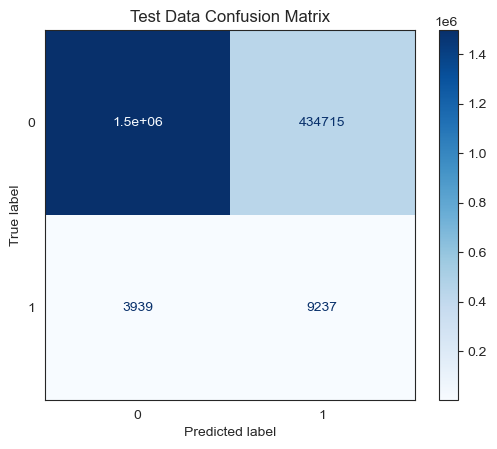

Test AUC-ROC: 0.81


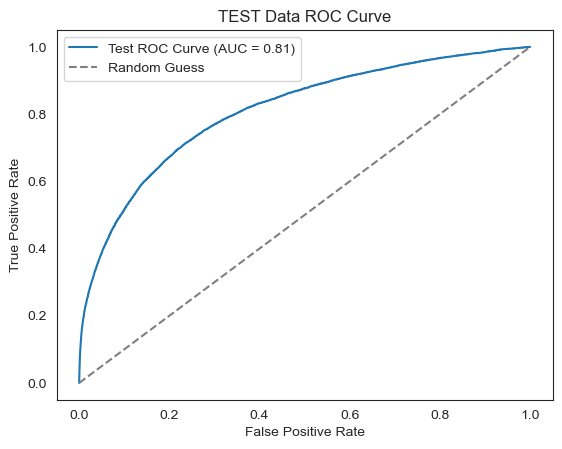

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

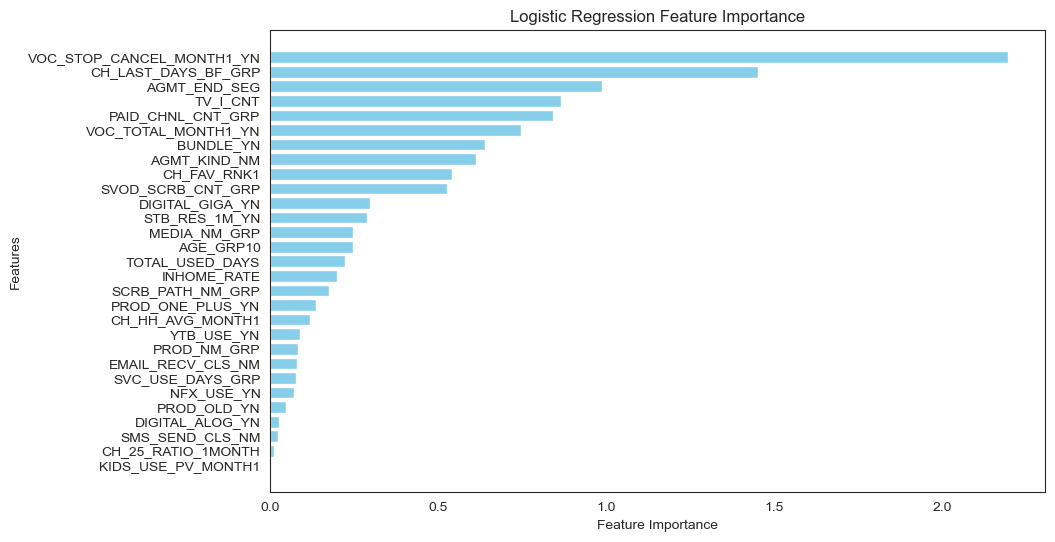

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

LGBM 가중치 진행

In [15]:
from lightgbm import LGBMClassifier

# 독립 변수 & 종속 변수 설정
X_train = train.drop(columns=['churn'])  # 독립 변수
y_train = train['churn']  # 종속 변수

# LightGBM 모델 생성
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # 클래스 가중치 적용
    random_state=42 
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.81

Classification Report (테스트 데이터):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.81      0.89   1945595


Confusion Matrix (테스트 데이터):
[[1566292  366127]
 [   3447    9729]]


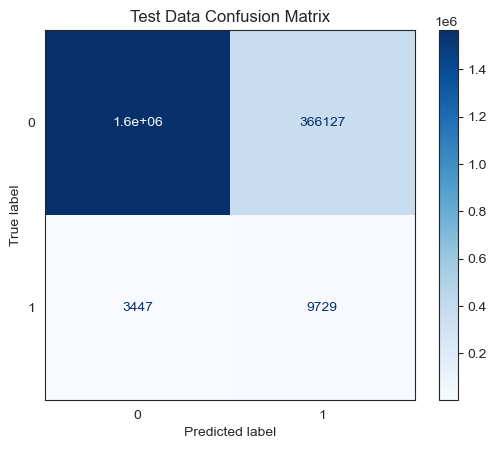

Test AUC-ROC: 0.85


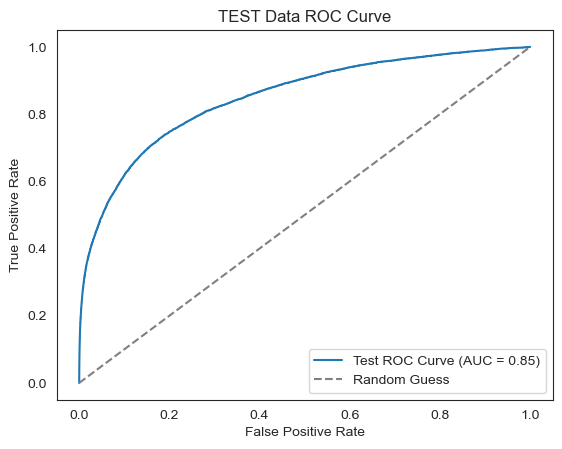

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# 테스트 데이터 불러오기
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# 테스트 데이터 (Test) 평가
# -----------------------------------------------------------
# 테스트 데이터(test) 예측
test_predictions = lgbm_model.predict(X_test)

# 정확도 확인
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification 리포트
print("\nClassification Report (테스트 데이터):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (혼동행렬)
print("\nConfusion Matrix (테스트 데이터):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC 계산
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve 시각화
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

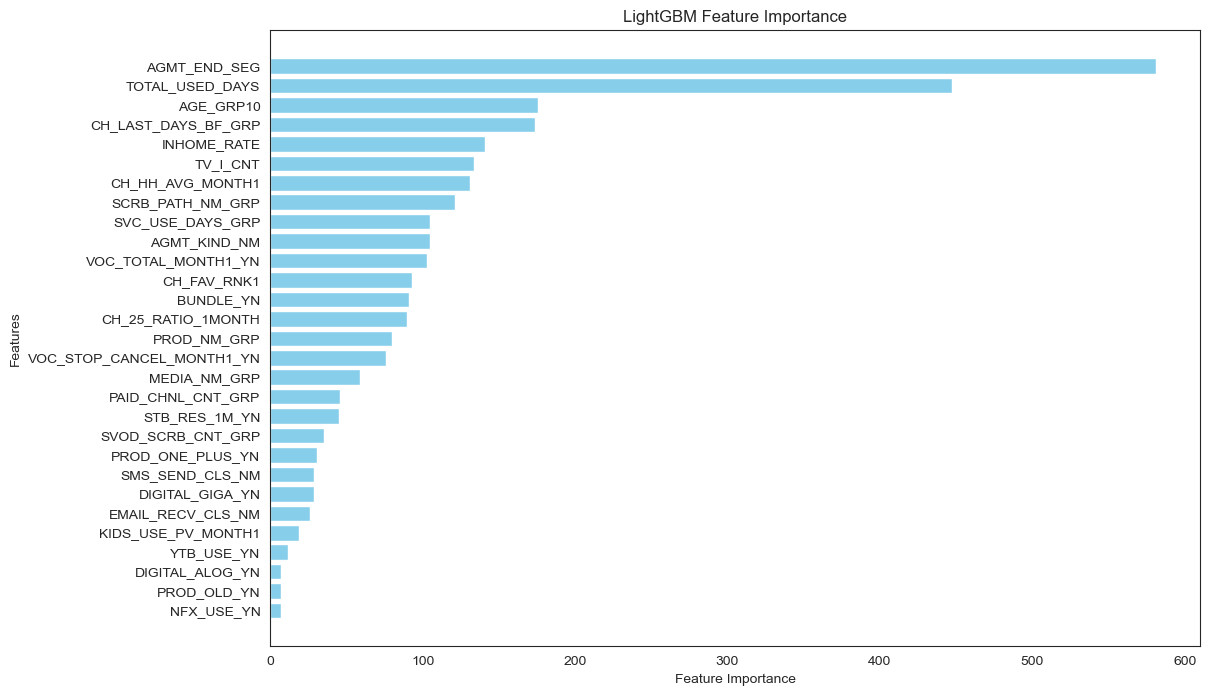

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance 추출
feature_importance = lgbm_model.feature_importances_

# DataFrame 변환 및 정렬
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()